In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, zero_one_loss

In [3]:
X_train = pd.read_csv("X_train.csv")
X_train.shape

(125973, 118)

In [4]:
X_test = pd.read_csv("X_test.csv")
X_test.shape

(22544, 118)

In [5]:
y_train = pd.read_csv("y_train.csv")
y_train.shape

(125973, 1)

In [6]:
y_test = pd.read_csv("y_test.csv")
y_test.shape

(22544, 1)

In [7]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
y_train.head()

,attack_category
0,benign
1,benign
2,dos
3,benign
4,benign


In [10]:
col_names = np.array(X_train.columns.tolist())

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [13]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])

In [14]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [15]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.259730e+05,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,125973.000000,1.259730e+05,1.259730e+05,1.259730e+05,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,2.549477e-17,4.556674e+04,1.977911e+04,0.000198,4.230328e-19,4.455945e-18,0.204409,2.989431e-18,1.558171e-17,-6.549957e-18,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,1.000004e+00,5.870331e+06,4.021269e+06,0.014086,1.000004e+00,1.000004e+00,2.149968,1.000004e+00,1.000004e+00,1.000004e+00,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,-1.102492e-01,0.000000e+00,0.000000e+00,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,0.000000e+00,0.000000e+00,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,4.400000e+01,0.000000e+00,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.102492e-01,2.760000e+02,5.160000e+02,0.000000,-8.948642e-02,-7.735985e-03,0.000000,-2.702282e-02,1.235694e+00,-1.166364e-02,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.636428e+01,1.379964e+09,1.309937e+09,1.000000,1.174348e+01,2.088191e+02,77.000000,1.104972e+02,1.235694e+00,3.123689e+02,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
y_train_bin = y_train.apply(lambda x: 0 if x is "benign" else 1)
y_test_bin = y_test.apply(lambda x: 0 if x is "benign" else 1)

In [17]:
clf = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

In [18]:
clf.fit(X_train, y_train)

/home/eshban/global_env/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [19]:
y_preds = clf.predict(X_test)

In [20]:
print(classification_report(y_test, y_preds, target_names=y_test["attack_category"].unique().tolist()))

              precision    recall  f1-score   support

         dos       0.69      0.96      0.80      9711
      benign       0.96      0.71      0.82      7636
       probe       0.64      0.77      0.70      2423
         r2l       0.88      0.15      0.25      2574
         u2r       0.75      0.06      0.11       200

    accuracy                           0.75     22544
   macro avg       0.78      0.53      0.54     22544
weighted avg       0.80      0.75      0.73     22544



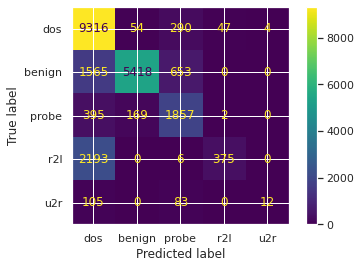

In [21]:
cm = confusion_matrix(y_test, y_preds)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=y_test["attack_category"].unique().tolist())
cm_plot.plot()
plt.show()

In [22]:
err = zero_one_loss(y_test, y_preds)
print(f"Error: {round(err, 3)}")

Error: 0.247
